<a href="https://colab.research.google.com/github/salviyas/k-NN-Classifier/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



In [2]:
iris=datasets.load_iris()

X=iris.data
y=iris.target

df=pd.DataFrame(data=np.c_[X,y],columns=iris.feature_names+['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [4]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [7]:
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")

Accuracy:1.0


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


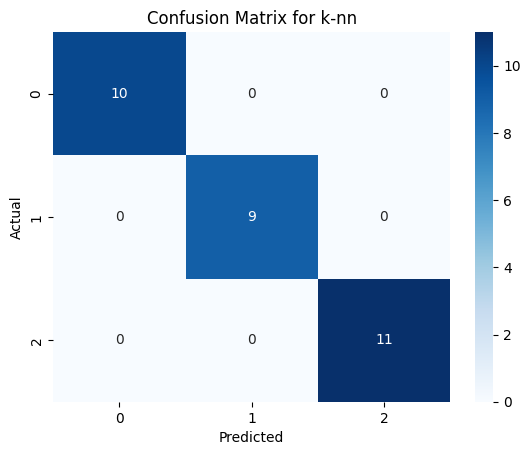

In [10]:
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)


sns.heatmap(conf_matrix,annot=True,cmap="Blues",fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for k-nn")
plt.show()

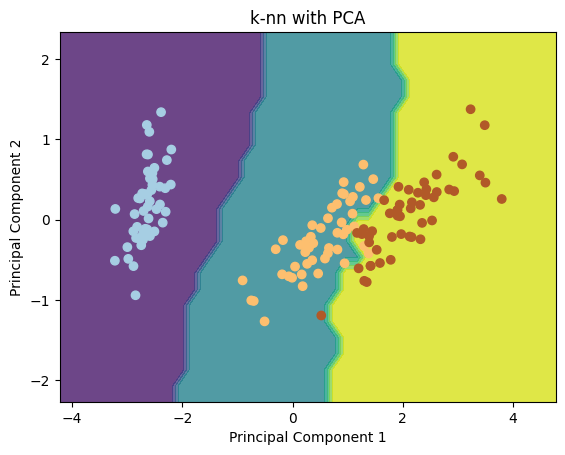

In [12]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

X_train_pca,X_test_pca, _, _=train_test_split(X_pca,y,test_size=0.2,random_state=42)

knn.fit(X_train_pca,y_train)

h=0.2
x_min,x_max=X_pca[:,0].min()-1,X_pca[:,0].max()+1
y_min,y_max=X_pca[:,1].min()-1,X_pca[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha=0.8)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("k-nn with PCA")
plt.show()